<a href="https://www.kaggle.com/code/mattspotify2023/surface-crack-detection-classification?scriptVersionId=215103427" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms
from torch.utils.data import DataLoader,Dataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
import shutil
import torch.optim as optim

Text(0.5, 1.0, 'Negative')

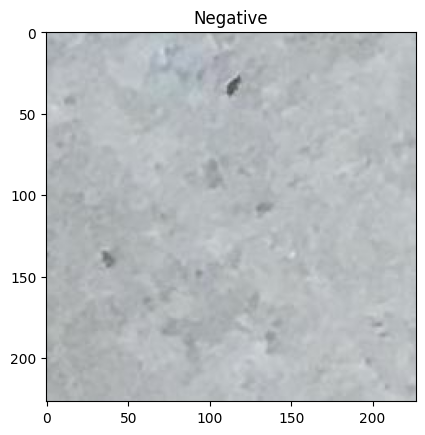

In [4]:
#display a positive and a negative image
image = cv2.imread('/kaggle/input/surface-crack-detection/Negative/00004.jpg')
plt.imshow(image)
plt.title('Negative')

Text(0.5, 1.0, 'Positive')

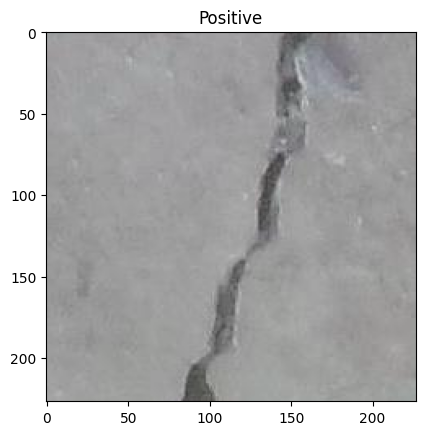

In [5]:
image = cv2.imread('/kaggle/input/surface-crack-detection/Positive/00005.jpg')
plt.imshow(image)
plt.title('Positive')

In [6]:
len(os.listdir('/kaggle/input/surface-crack-detection/Negative'))

20000

In [7]:
os.chdir('/kaggle/working/')

In [8]:
os.mkdir('train')

In [9]:
os.mkdir('test')

In [10]:
os.mkdir('valid')

In [11]:
os.chdir('/kaggle/working/train')
os.makedirs('Positive',exist_ok=True)
os.makedirs('Negative',exist_ok=True)
os.chdir('/kaggle/working/test')
os.makedirs('Positive',exist_ok=True)
os.makedirs('Negative',exist_ok=True)
os.chdir('/kaggle/working/valid')
os.makedirs('Positive',exist_ok=True)
os.makedirs('Negative',exist_ok=True)

In [12]:
os.chdir('/kaggle/working/')

In [13]:
#Negative 
for i,file_name in enumerate(os.listdir('/kaggle/input/surface-crack-detection/Negative')):
    if i <1000 and file_name.endswith('.jpg'):
        src = os.path.join('/kaggle/input/surface-crack-detection/Negative',file_name)
        dest = os.path.join('/kaggle/working/train/Negative',file_name)
        shutil.copy(src,dest)
    elif i>1000 and i <1500 and file_name.endswith('.jpg'):
        dest = os.path.join('/kaggle/working/valid/Negative',file_name)
        src = os.path.join('/kaggle/input/surface-crack-detection/Negative',file_name)
        shutil.copy(src,dest)
    # elif i>1500 and i <2000 and file_name.endswith('.jpg'):
    #     dest = os.path.join('/kaggle/working/test/Negative',file_name)
    #     src = os.path.join('/kaggle/input/surface-crack-detection/Negative',file_name)
    #     shutil.copy(src,dest)
        

In [14]:
len(os.listdir('/kaggle/working/valid/Positive'))

0

In [15]:
#Positive
for i,file_name in enumerate(os.listdir('/kaggle/input/surface-crack-detection/Positive')):
    if i <1000 and file_name.endswith('.jpg'):
        src = os.path.join('/kaggle/input/surface-crack-detection/Positive',file_name)
        dest = os.path.join('/kaggle/working/train/Positive',file_name)
        shutil.copy(src,dest)
    elif i>1000 and i <1500 and file_name.endswith('.jpg'):
        src = os.path.join('/kaggle/input/surface-crack-detection/Positive',file_name)
        dest = os.path.join('/kaggle/working/valid/Positive',file_name)
        shutil.copy(src,dest)
    # elif i>1501 and i <2000 and file_name.endswith('.jpg'):
    #     dest = os.path.join('/kaggle/working/test/Negative',file_name)
    #     src = os.path.join('/kaggle/input/surface-crack-detection/Negative',file_name)
    #     shutil.copy(src,dest)

In [16]:
train_dir = '/kaggle/working/train'
# test_dir = '/kaggle/working/test'
valid_dir = '/kaggle/working/valid'

In [17]:
transform_func = transforms.Compose([transforms.ToTensor()])

In [18]:
train_data = ImageFolder(root = train_dir,transform = transform_func)
valid_data = ImageFolder(root = valid_dir,transform = transform_func)
# test_data = ImageFolder(root = test_dir,transform = transform_func)

In [19]:
train_dataloader = DataLoader(train_data,batch_size=64,num_workers=4,shuffle=True)
valid_dataloader = DataLoader(valid_data,batch_size=64,num_workers=4,shuffle=False)
# test_dataloader = DataLoader(test_data,batch_size=64,num_workers=4,shuffle=False)

In [20]:
train_data.class_to_idx

{'Negative': 0, 'Positive': 1}

In [21]:
train_data[0][0].shape

torch.Size([3, 227, 227])

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
class simpleCNN(nn.Module):
    def __init__(self):
        super(simpleCNN,self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size = 3,stride=1),
            nn.ReLU(),
            nn.Conv2d(64,128,3,1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128,128,3,1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(373248,128),
            nn.ReLU(),
            nn.Linear(128,2)
            
        )
    def forward(self,x):
        x = self.cnn(x)
        return x

In [24]:
model = simpleCNN().to(device)

In [25]:
model

simpleCNN(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=373248, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [26]:
from torchsummary import summary

In [27]:
summary(model,input_size = (3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 225, 225]           1,792
              ReLU-2         [-1, 64, 225, 225]               0
            Conv2d-3        [-1, 128, 223, 223]          73,856
              ReLU-4        [-1, 128, 223, 223]               0
         MaxPool2d-5        [-1, 128, 111, 111]               0
            Conv2d-6        [-1, 128, 109, 109]         147,584
              ReLU-7        [-1, 128, 109, 109]               0
         MaxPool2d-8          [-1, 128, 54, 54]               0
           Flatten-9               [-1, 373248]               0
           Linear-10                  [-1, 128]      47,775,872
             ReLU-11                  [-1, 128]               0
           Linear-12                    [-1, 2]             258
Total params: 47,999,362
Trainable params: 47,999,362
Non-trainable params: 0
-------------------------

In [28]:
optimizer = optim.Adam(model.parameters(),lr=1e-03)
loss_fn = nn.CrossEntropyLoss()
epochs = 5

In [29]:
train_losses,test_losses = [],[]
for epoch in range(epochs):
    model.train()
    train_loss =0
    for batch,(x,y) in enumerate(train_dataloader):
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        loss = loss_fn(pred,y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        #Metrics 
        train_loss += loss.item()
        
    avg_loss = train_loss/len(train_dataloader)
    train_losses.append(avg_loss)
    print(f'Epoch: {epoch} | Train loss: {avg_loss}')

    model.eval()
    with torch.no_grad():
        test_loss,correct=0,0
        total_samples = 0
        for batch,(x,y) in enumerate(valid_dataloader):
            x = x.to(device)
            y = y.to(device)
            pred = model(x)
            loss = loss_fn(pred,y)
            total_samples += y.size(0)
            test_loss += loss.item()
            correct += ((torch.argmax(torch.softmax(pred,dim=1),dim=1)==y).sum().item())
        avg_test_loss = test_loss/len(valid_dataloader)
        avg_correct = correct/total_samples
        test_losses.append(avg_test_loss)
        print(f'Test_loss {avg_test_loss} | Accuracy {avg_correct}')

Epoch: 0 | Train loss: 0.9429772449657321
Test_loss 0.5835379497148097 | Accuracy 0.7254509018036072
Epoch: 1 | Train loss: 0.39902949711540714
Test_loss 0.46137417387217283 | Accuracy 0.8587174348697395
Epoch: 2 | Train loss: 0.29747554403729737
Test_loss 0.12625710340216756 | Accuracy 0.9649298597194389
Epoch: 3 | Train loss: 0.1209204167680582
Test_loss 0.12508967093890533 | Accuracy 0.9729458917835672
Epoch: 4 | Train loss: 0.08295794598234352
Test_loss 0.07366418279707432 | Accuracy 0.9719438877755511


In [30]:
torch.save(model.state_dict(), "model_weights.pth")

In [31]:
model.load_state_dict(torch.load("model_weights.pth", map_location=device))  # Replace with your saved model file


<ipython-input-31-5541dac916df>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_weights.pth", map_location=device))  # Replace with 

<All keys matched successfully>

In [32]:
model.to(device)

simpleCNN(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=373248, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [33]:
model.eval()

simpleCNN(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=373248, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [34]:
transform = transforms.Compose([
    # transforms.Resize((224, 224)),  # Resize to the input size expected by your model
    transforms.ToTensor(),          # Convert to tensor
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (adjust if different)
])

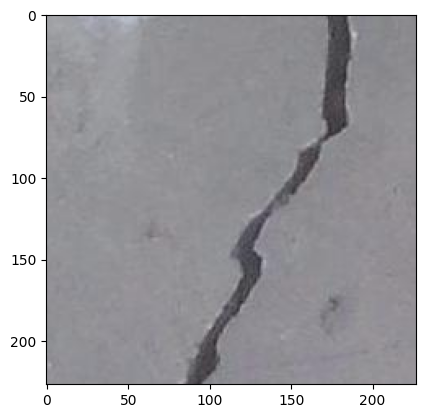

In [43]:
image_path = '/kaggle/input/surface-crack-detection/Positive/00008.jpg'
image = Image.open(image_path).convert("RGB")
im = cv2.imread(image_path)
plt.imshow(im)


In [44]:
input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

In [45]:
with torch.no_grad():
    output = model(input_tensor)  # Forward pass
    prediction = torch.argmax(torch.softmax(output, dim=1), dim=1)

In [46]:
class_names = ["No Crack", "Crack"]  # Replace with your class labels
predicted_class = class_names[prediction.item()]
print(f"Predicted Class: {predicted_class}")

Predicted Class: Crack
